# Proyecto 03 - Series de Tiempo

### Repositorio del proyecto -> https://github.com/Ignacio-81/DS_proyecto_ST

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?


### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

Eploramos la informacion en el Dataset:

In [3]:
data_2019.info()
data_2019.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
5,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EXENTO,1
6,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,NO COBRADO,276
7,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,TELEPASE,159
8,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Pesado,TELEPASE,5
9,2019,2019-01-01,0,1,Martes,Avellaneda,Provincia,Liviano,EFECTIVO,12


Hay Informacion Nula?

In [4]:
data_2019.isna().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2018.isna().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             238869 non-null  object        
 1   sentido         238869 non-null  object        
 2   tipo_vehiculo   238869 non-null  object        
 3   cantidad_pasos  238869 non-null  int64         
 4   fecha           238869 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.1+ MB


Analizamos la distribucion de los pasos por el peaje para cada Dia de la Semana:

<AxesSubplot:xlabel='dia', ylabel='count'>

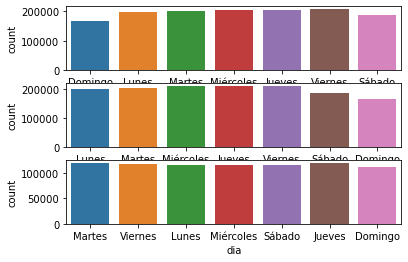

In [17]:
fig, ax = plt.subplots(3)
sns.countplot(ax=ax[0], x="dia", data=data_2017)
sns.countplot(ax=ax[1], x="dia", data=data_2018)
sns.countplot(ax=ax[2], x="dia", data=data_2019)

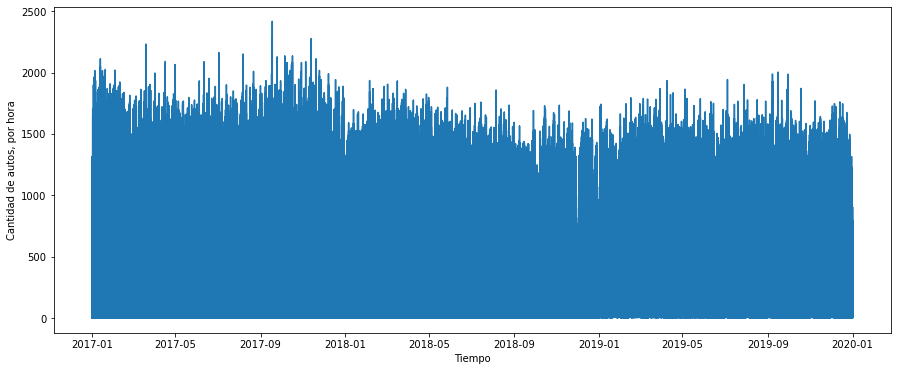

In [18]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

Encontramos que la visibilidad de los datos en el grafico actual es una poco complicada. Vamos a re samplear nuesrto dataet por DIA para poder mejorar

In [19]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


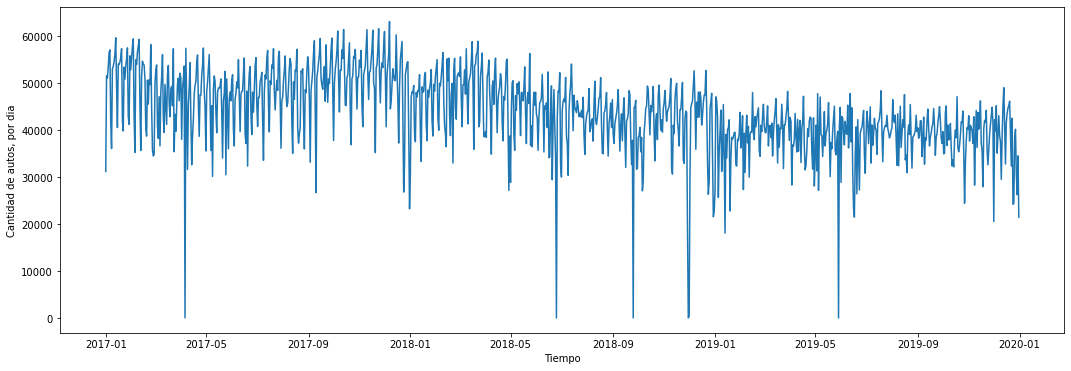

In [20]:
plt.figure(figsize = (18,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [21]:
diario.sort_values('cantidad_pasos').head(10)

,cantidad_pasos
fecha,
2018-06-25,0
2018-09-25,0
2018-11-30,0
2019-05-29,0
2017-04-06,40
2018-12-01,350
2019-01-13,18076
2018-11-29,19728
2019-12-01,20553


Vemos que para algunas fechas los pasos son 0 , a que se debe? Las fechas no parecen ser feriados nacionales, pero aun asi deberian tener un flujo vehicular.

De todas formas revisamos la magnitud de los valores "bajos" para poder aplicar un filtro y tener un grafico mas limpio. Para esto vamos a INTERPOLAR los datos , primero convirtiendo en NaN y luego aplicando la interpolacion.

In [22]:
diario.cantidad_pasos[diario.cantidad_pasos < 18000] = np.nan

Utilizamos la funcion "rolling" la cual nos da una ventana de valores en determinado periodo y aplicamos el valor medio para este muestreo.

In [23]:
diario['cantidad_pasos']=diario.cantidad_pasos.fillna(diario.cantidad_pasos.rolling(4,min_periods=1).mean())

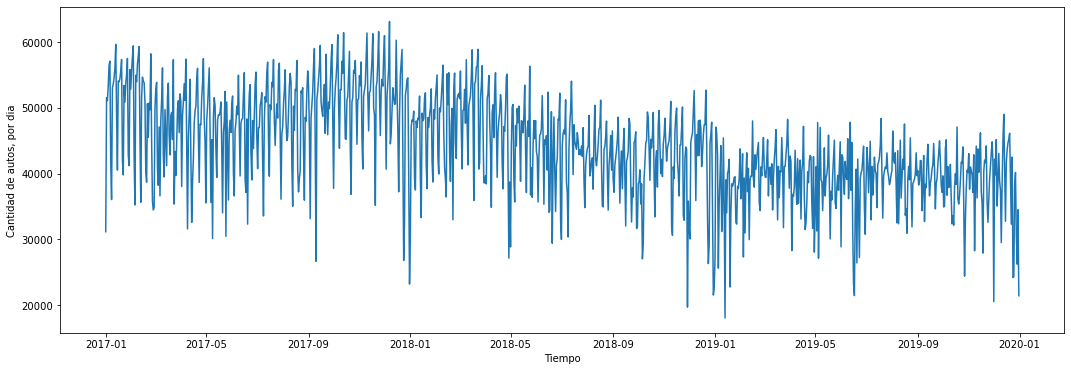

In [24]:
plt.figure(figsize = (18,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Cuales son los dias con mas trafico?

In [25]:
diario.sort_values('cantidad_pasos', ascending = False).head(10)

,cantidad_pasos
fecha,
2017-12-07,63127.0
2017-11-24,61594.0
2017-10-13,61421.0
2017-11-10,61382.0
2017-11-17,61259.0
2017-10-06,61099.0
2017-12-01,60985.0
2017-12-15,60280.0
2017-01-13,59651.0


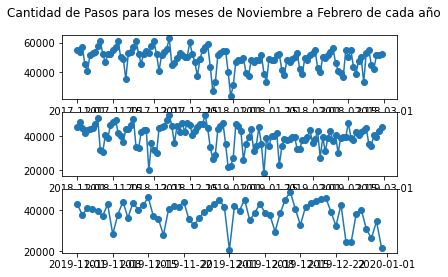

In [26]:
fig, axs = plt.subplots(3)
fig.suptitle('Cantidad de Pasos para los meses de Noviembre a Febrero de cada año')
axs[0].plot(diario.loc['2017-11':'2018-02', 'cantidad_pasos'], marker='o',linestyle='-' )
axs[1].plot(diario.loc['2018-11':'2019-02', 'cantidad_pasos'], marker='o',linestyle='-' )
axs[2].plot(diario.loc['2019-11':'2019-12', 'cantidad_pasos'], marker='o',linestyle='-' )

#### Estas graficas muestran una relacion para el mismo periodo para los distintos años... Vemos que mas alla de algunas diferencias , el comportamiento es similar, y el flujo sigue siendo importante mas alla de ser un periodo de vacaciones!


In [27]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2019-12-27,40182.0
2019-12-28,30681.0
2019-12-29,26259.0


In [28]:
anual = dataset.resample('Y', on = 'fecha').sum()
anual = anual.set_index(anual.index.year)
anual.index.name='Año'
anual

,cantidad_pasos
Año,
2017,17783512
2018,15966944
2019,14115125


Text(0.5, 1.0, 'Pasos por Peaje Illia , pago Efectivo , anual')

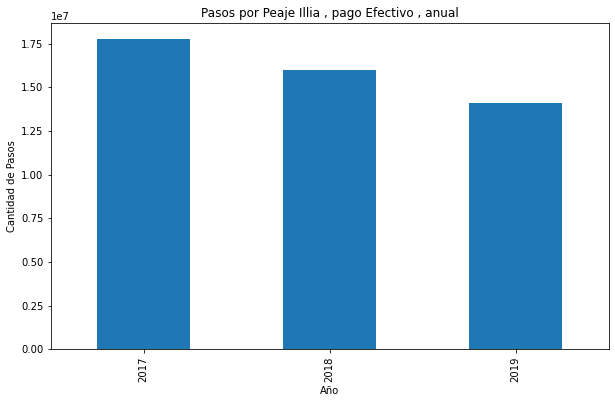

In [29]:
plt.figure(figsize = (10,6))
eje = anual['cantidad_pasos'].plot.bar()
eje.set_ylabel('Cantidad de Pasos')
eje.set_title('Pasos por Peaje Illia , pago Efectivo , anual')

## Tendencia - Estacionalidad - Ruido

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')

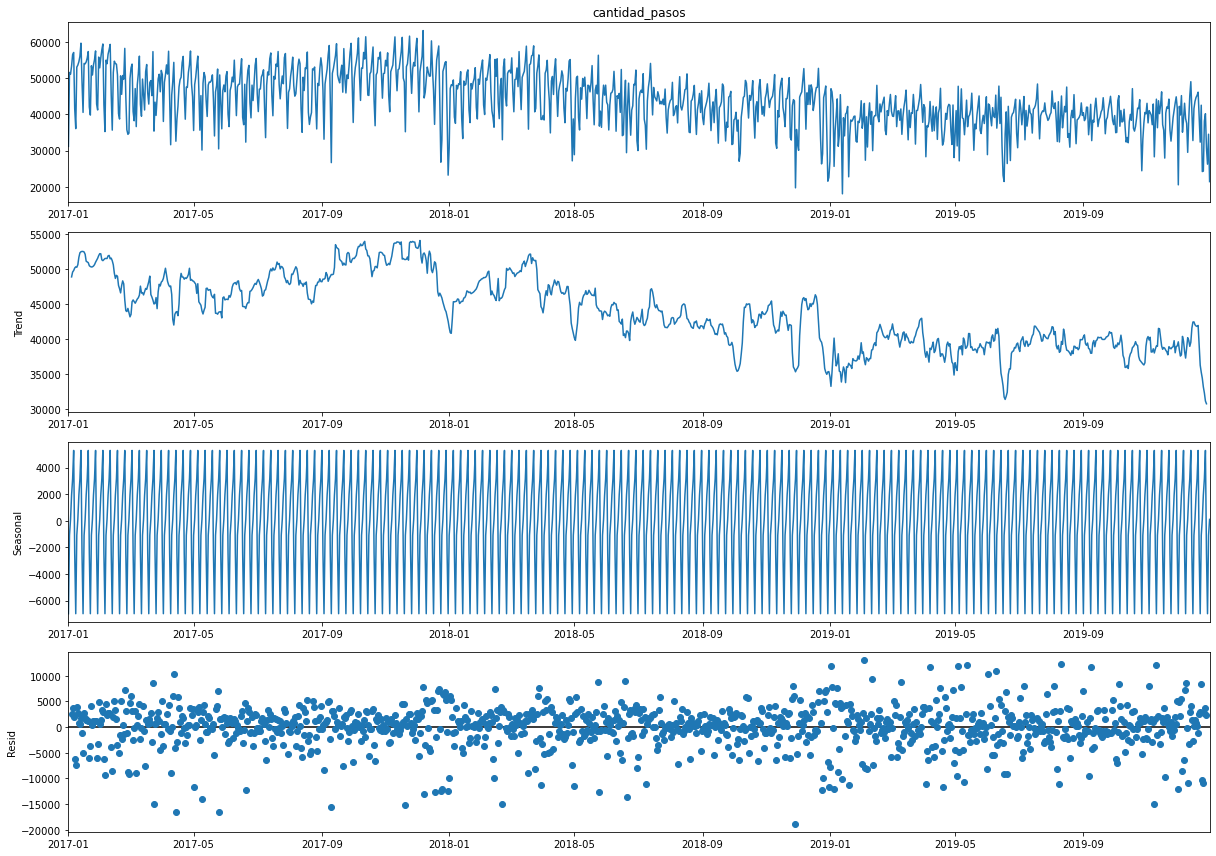

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [17,12]
result.plot()
plt.show()

Del Grafico anterior podemos ver la tendencia es "negativa"  . Que quiere decir esto? Esto dice que la flujo de vehiculos que abonan en Efectivo en este peaje va decreciendo a medida que pasan estos años.

Podemos ver una estacionalidad, claramente el flujo de los vehiculos tiene una componentes que respeta una cantidad periodica de pasos.

Ya conocemos el futuro despues de 2019, el efecto covid va a destrozar cualquier prediccion .... Veamos de antemano la informacion encontrada de todos los peajes y todas las modalidades de pago de AU Buenos Aires:
La informacion es recuperada de la pagina de "Estadisticas y sensos de Buenos Aires"
https://www.estadisticaciudad.gob.ar/eyc/

Text(0.5, 1.0, 'Flujo Vehicular para los Peajes de Buenos Aires ')

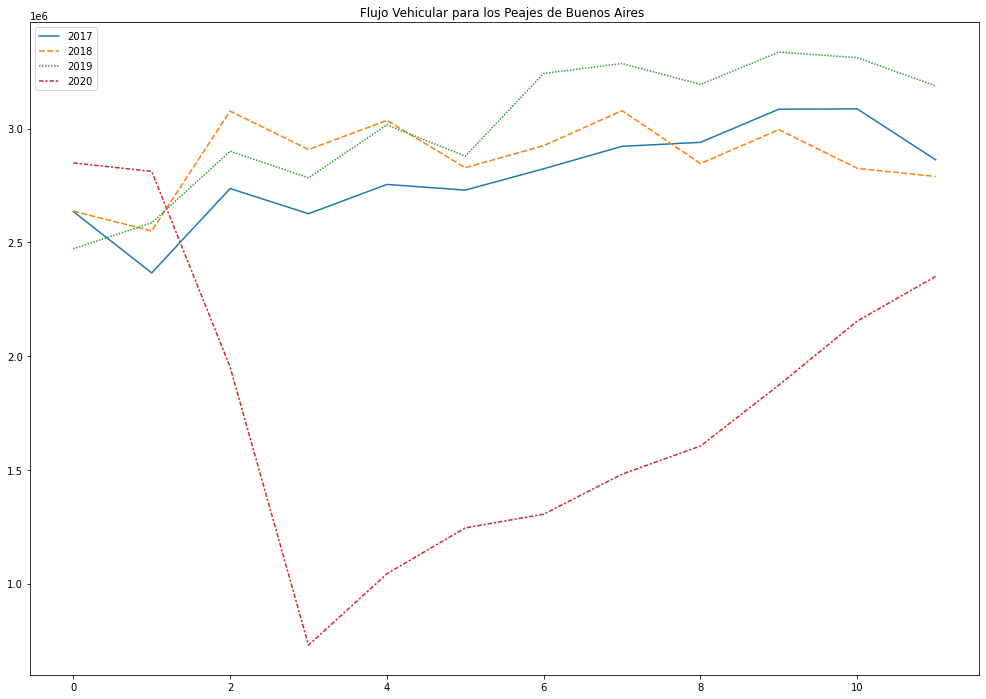

In [34]:
var= pd.read_excel('Datos AU.xls')
var.head()
p = sns.lineplot(data=var)
p.set_title("Flujo Vehicular para los Peajes de Buenos Aires ")

### Componente Residual (Ruido) y Autocorrelación

Vamos a analizar la componente "Residual" de nuestra serie de tiempo:

(array([  1.,   2.,   5.,   6.,  15.,  12.,  18.,  24.,  45.,  55., 112.,
        226., 249., 166.,  73.,  38.,  23.,   8.,   3.,   8.]),
 array([-18801.11319582, -17210.68573698, -15620.25827814, -14029.83081929,
        -12439.40336045, -10848.97590161,  -9258.54844277,  -7668.12098393,
         -6077.69352509,  -4487.26606625,  -2896.83860741,  -1306.41114857,
           284.01631027,   1874.44376911,   3464.87122795,   5055.29868679,
          6645.72614563,   8236.15360447,   9826.58106331,  11417.00852215,
         13007.43598099]),
 <BarContainer object of 20 artists>)

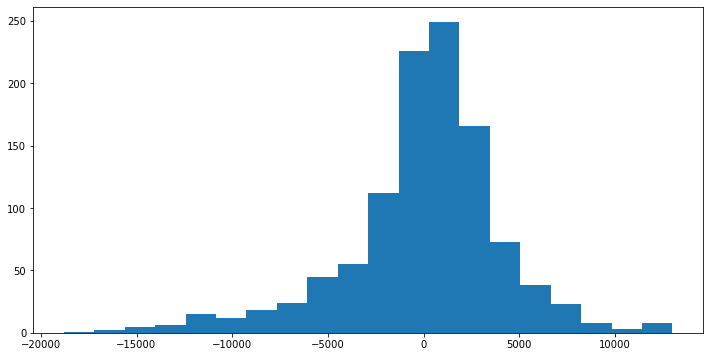

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(result.resid, bins=20)

Podemos observar que no coincide con una  "distribución normal" perfecta entonces podemos decir que no es exactamente ruido blanco. Lo que podria estar afectando la informacion de nuestra Serie de tiempo.

## Autocorrelación

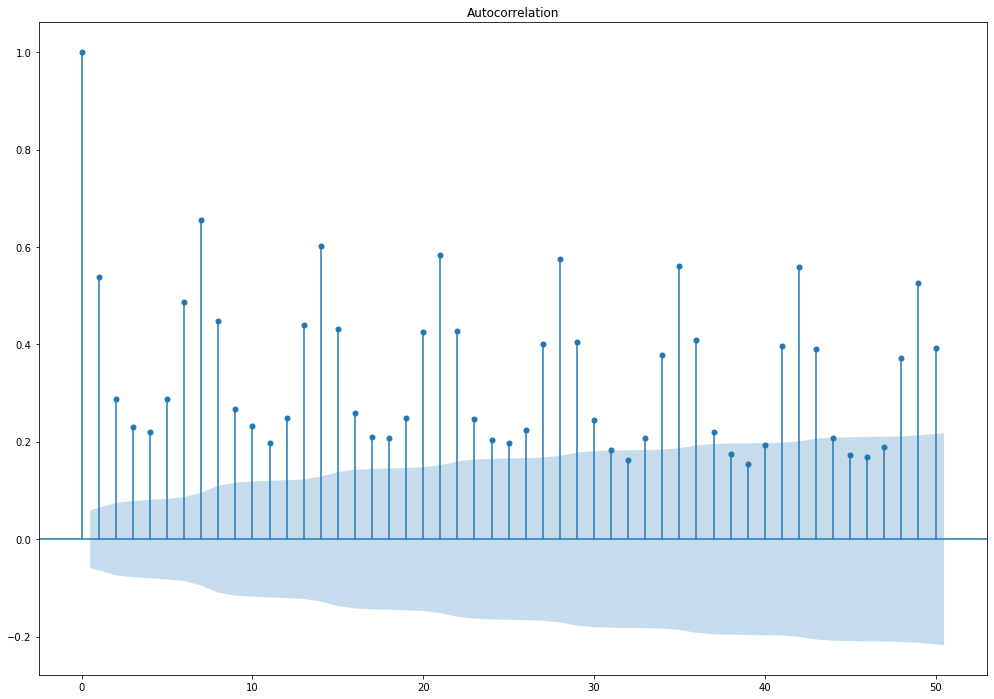

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario.cantidad_pasos, lags = 50)
plt.show()

**Autocorrelacion parcial**

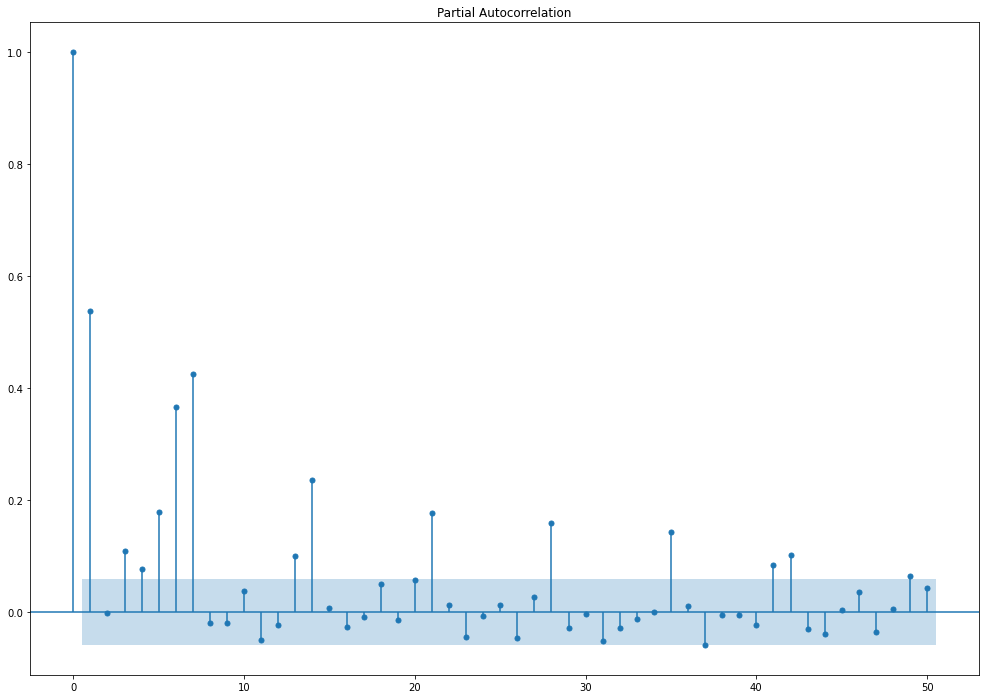

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(diario.cantidad_pasos, lags = 50)
plt.show()

#### Se ve un patron ciclico que se repite en la autocorrelacion. Vemos muchos paramteros fuera de la zona entonces, podriamos decir que la serie no seria estacionaria. 

## Prediccion a Futuro

### One Step PredictioN

Vamos a utilizar el metodo de One-step-prediction para predecir nuestro objetivo > 2do Semestre de 2019

In [38]:
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


In [39]:
print(diario.shape)
type(diario)

(1095, 1)


pandas.core.frame.DataFrame

In [40]:
diario = diario.squeeze()
type(diario)

pandas.core.series.Series

In [41]:
look_back = 91  #Definimos 3 meses para nuestro look back ( 1/4 de año o 91 dias)

Creamos nuestros `X` e `y` con ceros para luego llenar con los datos:

In [42]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1003, 91) (1003,)


In [43]:
for i in range(X.shape[0]):
    X[i,:] = diario.iloc[i:i+look_back]
    y[i] = diario.iloc[i+look_back]

Vamos a Seleccionar nuestor datos de TRAIN y TEST. Vamos a dejar todos los datos anteriores al ultimo trimestre de 2019 para TRAIN, y dejamos los datos del ultimo trimestr de 2019 para TEST. Asi podemos predecir sobre los datos del ultimo trimestre de 2019:

In [44]:
N_train = (2*365+273) - look_back # Utilizamos todos los datos antes del ultimo trimestre de 2019 para entrenar 
N_test = 91 # Vamos a dejar el ultimo trimestre de 2019 para datos de Test.
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(912, 91) (912,)
(91, 91) (91,)


**Benchmark**: Antes de entrenar nuestro modelo , vamos a definir nuestro Benchmark.

In [45]:
from sklearn.metrics import mean_squared_error
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

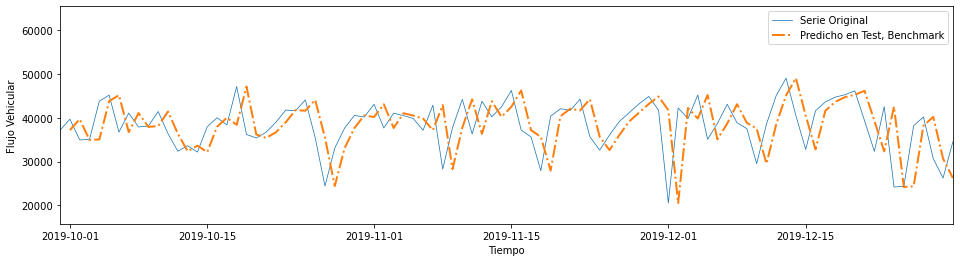

In [46]:
plt.figure(figsize=(16,4))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.legend()
plt.show()

In [47]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
print(y_test.shape, y_test_pred_benchmark.shape)

(91,) (91,)


Nuestro Valor de nuestro RMSE para el modelo de Benchmark es: 

In [48]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print(np.sqrt(MSE))

6846.953589848442


Ahora vamos a entrenar nuestro modelo de RandomForrestRegressor:

In [49]:
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1).fit(X_train,y_train)
rf = RandomForestRegressor(random_state=42)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Grilla para Random Search
param_dist = {'n_estimators':list(range(20, 120)),
              'max_depth' : [1, 10, 20, 50, 100],
             }

In [52]:
model_RS_rf = RandomizedSearchCV(rf, param_dist, n_iter=100, random_state=42, cv=5, n_jobs=-1)#,scoring='r2' )

model_RS_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 10, 20, 50, 100],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43,
                                                         44, 45, 46, 47, 48, 49, ...]},
                   random_state=42)

In [53]:
print("Mejores parametros: "+str(model_RS_rf.best_params_))
print("Mejor Score: "+str(model_RS_rf.best_score_)+'\n')
print("Mejor Score: "+str(model_RS_rf.best_estimator_)+'\n')
#print("Mejor Scorer: "+str(model_RS_rf.scorer_)+'\n')

Mejores parametros: {'n_estimators': 72, 'max_depth': 50}
Mejor Score: 0.35416363622094776

Mejor Score: RandomForestRegressor(max_depth=50, n_estimators=72, random_state=42)



In [54]:
def ver_rmse_r2 (modelo):
    
    from sklearn.metrics import mean_squared_error,r2_score
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'R2, Coeficiente de determinacion en Train: {r2_train}')
    print(f'R2, Coeficiente de determinacion en Test: {r2_test}')     

In [55]:
ver_rmse_r2(model_RS_rf)

Raíz del error cuadrático medio en Train: 1768.3469844178435
Raíz del error cuadrático medio en Test: 4892.413745087181
R2, Coeficiente de determinacion en Train: 0.9423270048096622
R2, Coeficiente de determinacion en Test: 0.2153776457680019


In [56]:
rf = RandomForestRegressor(n_estimators=37, max_depth=50, random_state=42).fit(X_train,y_train)

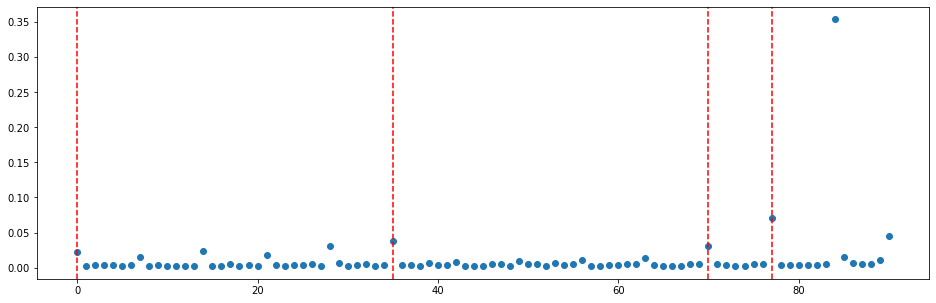

In [57]:
plt.figure(figsize = (16,5))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*35:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.axvline(77, linestyle ='--', color= 'r')
plt.show()

Observamos la impartancia de los features , no vemos ninguna relacion entre las mismas, a primera vista podriamos decir que estan 35 dias x distantes.

In [58]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [59]:
ver_rmse_r2(rf)

Raíz del error cuadrático medio en Train: 1829.849117851275
Raíz del error cuadrático medio en Test: 4903.874866307253
R2, Coeficiente de determinacion en Train: 0.9382455730059212
R2, Coeficiente de determinacion en Test: 0.21169717816385847


De nuestra Evaluacion del modelo , vemos que mejoramos el indicador RMSE en TRAIn respecto al Benchmark. Pero, por otro lado , vemos que el valor de r2 en 'TRAIN' es muy bueno pero en 'TEST' es realmente malo. 

Vamos a Graficar Nuestra prediccion :

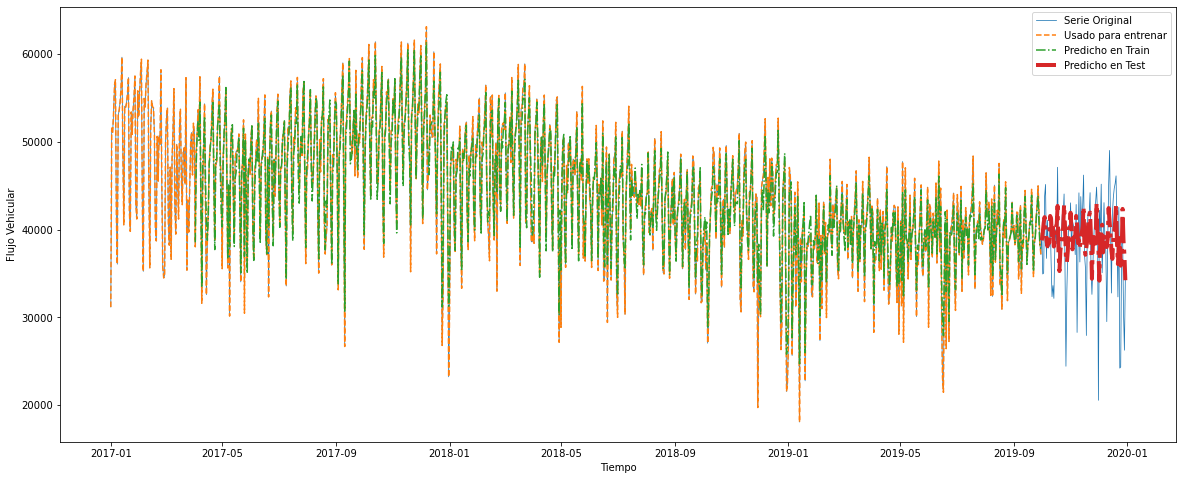

In [60]:
plt.figure(figsize=(20,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

Vamos a analizar la distribucion del error del modelo. Se puede ver la distribucion del error para cada modelo. Tambien en el grafico a la derecha se puede ver donde fallaria el modelo, y_test contra y_predicho 

Raíz del error cuadrático medio en Train: 1829.849117851275
Raíz del error cuadrático medio en Test: 4903.874866307253


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


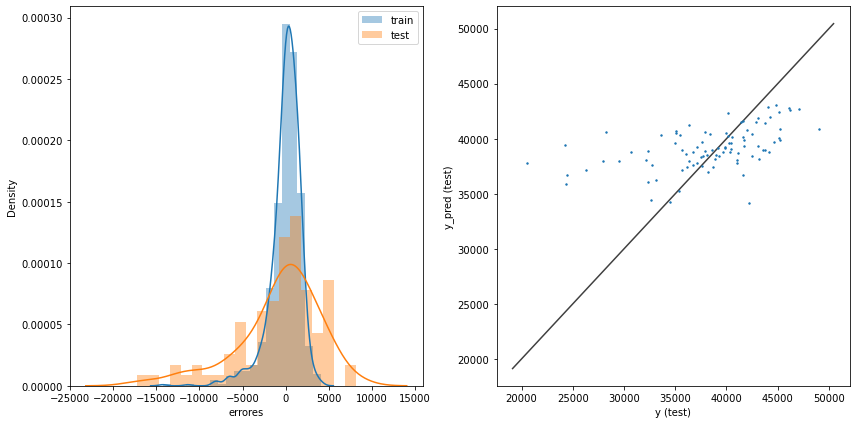

In [61]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#if rmse_train> rmse_test:
#    relacion=(rmse_test/rmse_train)*100
#else:
#    relacion=(rmse_train/rmse_test) *100 

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')


plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### Podemos ver en el grafico de Y_test contra los datos predichos (y_pred) que para valores "altos" el modelo tiene mayor diferencia y en esta zona, va a fallar. Las predicciones estan acumuladas en un rango , hay mucha dispersion entre y_test e Y_predict.

In [62]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [63]:
data_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


In [64]:
data_2020.drop(columns = ['mes','observacion','dia_fecha'], inplace=True)

In [65]:
data_2020.head()

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,Miércoles,0.0,1.0,ALBERDI,Auto,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,Miércoles,0.0,1.0,ALBERDI,Auto,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,Miércoles,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,Miércoles,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Centro,1.0
4,2020.0,2020-01-01 00:00:00,Miércoles,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0


In [66]:
data_2019.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Hay Informacion Nula?

In [67]:
data_2020.isna().sum()

periodo           0
fecha             0
dia               0
hora_inicio       0
hora_fin          0
estacion          0
tipo_vehiculo     0
forma_pago        0
sentido           0
cantidad_pasos    0
dtype: int64

In [68]:

nuevo_dataset_20 = pd.concat([data_2020,data_2019, data_2018, data_2017])

type(nuevo_dataset_20)

pandas.core.frame.DataFrame

In [69]:
for col in ['dia','estacion','tipo_vehiculo','forma_pago','sentido']:
        nuevo_dataset_20[col] = nuevo_dataset_20[col].str.lower()

nuevo_dataset_20

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,miércoles,0.0,1.0,alberdi,auto,efectivo,centro,24.0
1,2020.0,2020-01-01 00:00:00,miércoles,0.0,1.0,alberdi,auto,efectivo,provincia,80.0
2,2020.0,2020-01-01 00:00:00,miércoles,0.0,1.0,alberdi,auto,rec.deuda,provincia,1.0
3,2020.0,2020-01-01 00:00:00,miércoles,0.0,1.0,alberdi,auto,rec.deuda,centro,1.0
4,2020.0,2020-01-01 00:00:00,miércoles,0.0,1.0,alberdi,auto,rec.deuda,provincia,1.0
...,...,...,...,...,...,...,...,...,...,...
1372640,2017.0,2017-12-31,domingo,22.0,23.0,sarmiento,liviano,no cobrado,provincia,3.0
1372641,2017.0,2017-12-31,domingo,22.0,23.0,sarmiento,liviano,telepase,provincia,10.0
1372642,2017.0,2017-12-31,domingo,22.0,23.0,sarmiento,pesado,telepase,provincia,1.0
1372643,2017.0,2017-12-31,domingo,23.0,0.0,sarmiento,liviano,no cobrado,provincia,1.0


In [70]:
mask = np.logical_and(nuevo_dataset_20.estacion=='illia', nuevo_dataset_20.forma_pago == 'efectivo')
nuevo_dataset_20 = nuevo_dataset_20[mask]
nuevo_dataset_20.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [71]:
nuevo_dataset_20

,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01 00:00:00,miércoles,1.0,auto,centro,326.0
53,2020-01-01 00:00:00,miércoles,1.0,auto,provincia,319.0
134,2020-01-01 00:00:00,miércoles,2.0,auto,centro,199.0
135,2020-01-01 00:00:00,miércoles,2.0,auto,provincia,180.0
202,2020-01-01 00:00:00,miércoles,3.0,auto,centro,114.0
...,...,...,...,...,...,...
1372316,2017-12-31,domingo,22.0,pesado,provincia,8.0
1372319,2017-12-31,domingo,23.0,liviano,provincia,8.0
1372320,2017-12-31,domingo,23.0,liviano,provincia,148.0
1372324,2017-12-31,domingo,23.0,pesado,provincia,1.0


In [72]:

nuevo_dataset_20['fecha2'] = pd.to_datetime(nuevo_dataset_20.fecha) + pd.to_timedelta(nuevo_dataset_20.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
nuevo_dataset_20.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
nuevo_dataset_20.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
nuevo_dataset_20.sort_values('fecha', inplace = True)
nuevo_dataset_20.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_tp = nuevo_dataset_20.resample('D', on = 'fecha').sum()
print(diario_tp.shape)

<ipython-input-72-1a25c4341ae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_dataset_20['fecha2'] = pd.to_datetime(nuevo_dataset_20.fecha) + pd.to_timedelta(nuevo_dataset_20.hora_fin, unit = 'h')


(1461, 1)


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-72-1a25c4341ae2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_dataset_20.sort_values('fecha', inpl

In [73]:
diario_tp

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


In [74]:
print(type(diario_tp))
print(diario_tp.shape)

<class 'pandas.core.frame.DataFrame'>
(1461, 1)


In [75]:
diario_tp = diario_tp.squeeze()

print(type(diario_tp))
print(diario_tp.shape)

<class 'pandas.core.series.Series'>
(1461,)


In [76]:
N_20 = diario_tp.shape[0]
X_20 = np.zeros((N_20 - look_back - 1,look_back))
y_20 = np.zeros(N_20 - look_back - 1)
print(X_20.shape, y_20.shape)

(1369, 91) (1369,)


In [77]:
print(diario_tp.shape)

(1461,)


In [78]:
for i in range(X_20.shape[0]):
    X_20[i,:] = diario_tp.iloc[i:i+look_back]
    y_20[i] = diario_tp.iloc[i+look_back]

Vamos a Seleccionar nuestor datos de TRAIN y TEST. Vamos a dejar todos los datos anteriores al ultimo año , o sea los datos de 2017 , 2018 y 2019 , para dejar para evaluar los datos de 2020.

In [79]:
N_train = (3*365) - look_back # Utilizamos todos los datos antes del ultimo trimestre de 2019 para entrenar 
N_test = 1*365 # Vamos a dejar el ultimo trimestre de 2019 para datos de Test.
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X_20[:N_train,:]
y_train = y_20[:N_train]
print(X_train.shape, y_train.shape)

X_test = X_20[N_train:N_train+N_test,:]
y_test = y_20[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1004, 91) (1004,)
(365, 91) (365,)


In [80]:
y_pred = rf.predict(X_20)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [81]:
ver_rmse_r2(rf)

Raíz del error cuadrático medio en Train: 3901.836866277006
Raíz del error cuadrático medio en Test: 21765.455221574506
R2, Coeficiente de determinacion en Train: 0.7693489897836108
R2, Coeficiente de determinacion en Test: -2.1737532040669074


Vamos a Graficar Nuestra prediccion :

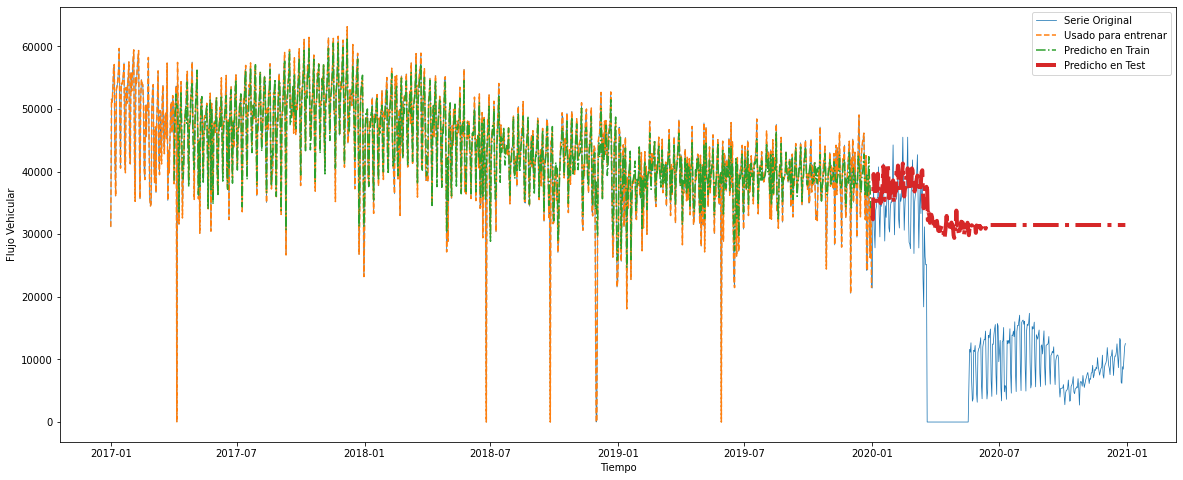

In [82]:
plt.figure(figsize=(20,8))
plt.plot(diario_tp.index[:length_total], diario_tp[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario_tp.index[:N_train + look_back], diario_tp[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario_tp.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario_tp.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Flujo Vehicular')
plt.show()

#### Finalmente podemos verificar que el modelo aun sigue con un error "grande" para predecir el año 2020 y que claramente sumado al efecto "covid" claramente no podra predecir dicha modificacion del curso "normal" del flujo vehicular.

### Próximos Pasos - Investigación:

Como vimos mas arriba, analizamos una "tendencia negativa" en el flujo de vehiculos que pasan por este peaje con el metodo de pago "efectivo". Pero, realmente , que sucede??? , es posible que el flujo vehicular baje? Puede ser que las personas cambien el tipo de trasnporte? puede ser que se muevan hacia otra forma de pago? 

Vamos a analizar el caso de "TelePeaje" , es posible que la realacion del cambio en el 'abito' del tipo de pago influya? Veamos...

In [32]:
nuevo_dataset = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(nuevo_dataset.estacion=='Illia', nuevo_dataset.forma_pago == 'TELEPASE')
nuevo_dataset = nuevo_dataset[mask]
nuevo_dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

nuevo_dataset['fecha2'] = pd.to_datetime(nuevo_dataset.fecha) + pd.to_timedelta(nuevo_dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
nuevo_dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
nuevo_dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
nuevo_dataset.sort_values('fecha', inplace = True)
nuevo_dataset.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_tp = nuevo_dataset.resample('D', on = 'fecha').sum()
print(diario_tp.shape)
diario_tp.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


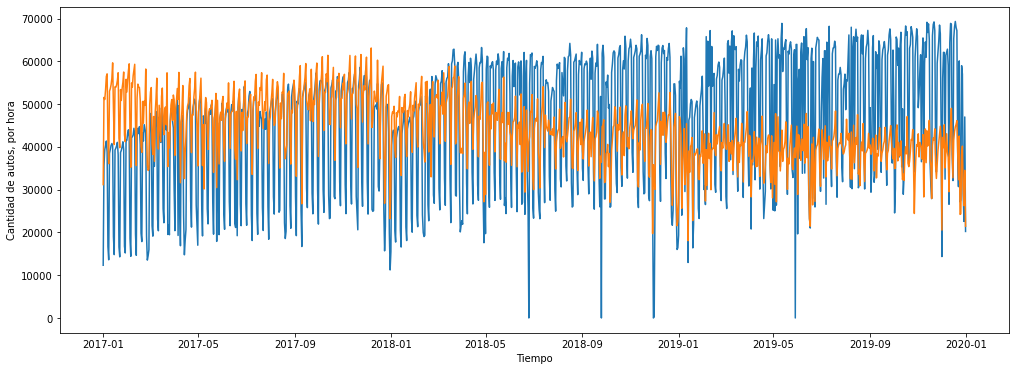

In [33]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (17,6))
plt.plot(diario_tp.index, diario_tp.cantidad_pasos)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

#### Vemos en nuestro grafico que a medida que disminuye el pago en efectivo , aumenta el pago de TELEPASE. Entonces.... Podemos analizar la evolucion con otro medios de pago? 

Pleanteamos una hipotesis de por que el flujo de pago en efectivo disminuye y aclaramos que en realidad lo que puede pasar es que los usuarios migran hacia otra forma de pago. En este caso comparamos con Telepeaje.

Investigando en la pagina de Telepeaje vemos que hay muchos beneficios que surgen de utilizar este metodo de pago -> https://www.ausa.com.ar/aupass/
"Pago de peajes sin detenerte y sin necesidad de efectivo.

Débito automático con tarjeta de crédito.

Solo pagas si lo usas.

Cabinas exclusivas TelePASE.

Habilitación inmediata en toda la red de autopistas y dentro de las 96 hs. en la red de rutas nacionales del país.

Adhesión e instalación sin cargo para todos tus vehículos.

Detalle de pasadas facturadas on line."

#### Planteamos las siguientes preguntas/dudas a resolver:
#### Que sucede si efectuamos la misma prediccion cambiando el metodo de pago para el ultimo semstre de 2019? 
##### POsible Respuesta a demostrar -> En teoria , los resultados esperados a nivel de Error y prediccion serian los mismos...

#### Podemos mejorar la performance del modelo utilizado? (Rando Forrest) 
##### Posible Respuesta -> Utilizar algun modelo ya estudiado y/o utilizar un modelo nunca estudiado (investigando cual podria ser para mejorar la performance de Random Forrest, justificando y explicando los resultados)